In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
data=pd.read_csv("data.csv")

In [9]:
data.head()

,datetime,temp,ldr,Humidity,Target
0,19961101-11:00,30.0,590,NaN,0.0
1,19961101-12:00,28.0,596,12.0,0.0
2,19961101-13:00,24.0,581,24.0,0.0
3,19961101-14:00,24.0,580,21.0,0.0
4,19961101-16:00,23.0,586,27.0,0.0


In [10]:
data.tail()

,datetime,temp,ldr,Humidity,Target
993,19961219-01:00,7.0,169,61.0,1.0
994,19961219-03:00,9.0,162,46.0,1.0
995,19961219-05:00,15.0,242,31.0,1.0
996,19961219-06:00,18.0,545,22.0,0.0
997,19961219-07:00,19.0,578,NaN,0.0


In [11]:
sns.set_style('whitegrid')
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis')

AttributeError: 'DataFrame' object has no attribute 'isna'

In [12]:
data.describe()

,temp,ldr,Humidity,Target
count,987.000000,998.000000,996.000000,970.000000
mean,17.091185,517.409820,28.946787,0.210309
std,6.033358,235.332837,16.807398,0.407738
min,4.000000,0.000000,-20.000000,0.000000
25%,13.000000,399.000000,16.000000,0.000000
50%,17.000000,609.500000,31.000000,0.000000
75%,21.000000,663.000000,42.000000,0.000000
max,34.000000,1024.000000,67.000000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 5 columns):
datetime    998 non-null object
temp        987 non-null float64
ldr         998 non-null int64
Humidity    996 non-null float64
Target      970 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 39.1+ KB


In [14]:
data=data.dropna()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 1 to 996
Data columns (total 5 columns):
datetime    961 non-null object
temp        961 non-null float64
ldr         961 non-null int64
Humidity    961 non-null float64
Target      961 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 45.0+ KB


In [16]:
sns.set_style('whitegrid')
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis')

AttributeError: 'DataFrame' object has no attribute 'isna'

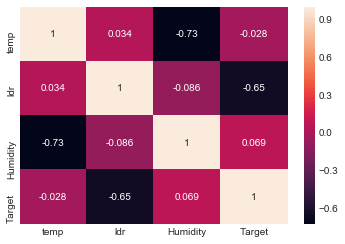

In [17]:
sns.heatmap(data.corr(),annot=True)

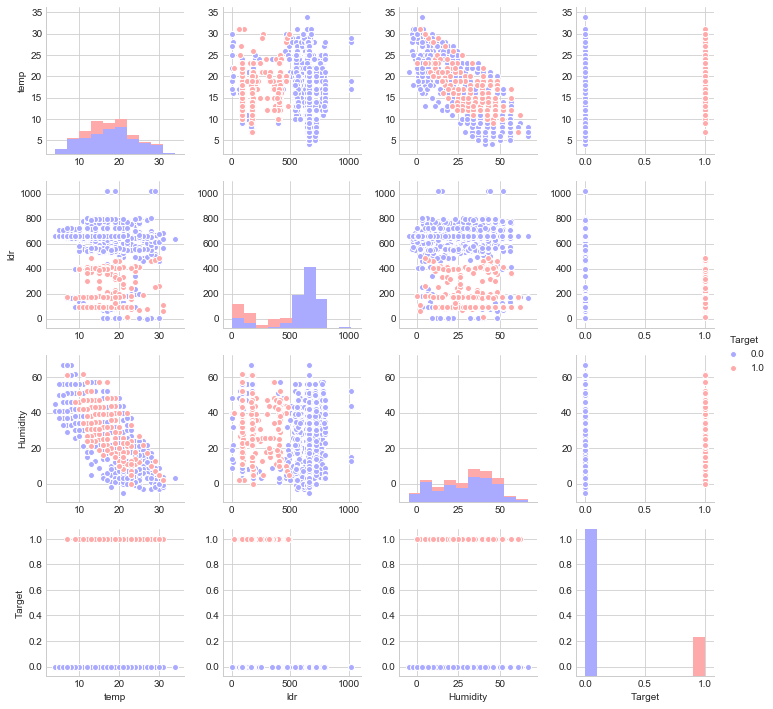

In [18]:
sns.pairplot(data,hue='Target',palette='bwr')

In [19]:
data.drop("datetime",axis=1,inplace=True)

In [20]:
data.head()

,temp,ldr,Humidity,Target
1,28.0,596,12.0,0.0
2,24.0,581,24.0,0.0
3,24.0,580,21.0,0.0
4,23.0,586,27.0,0.0
5,21.0,596,36.0,0.0


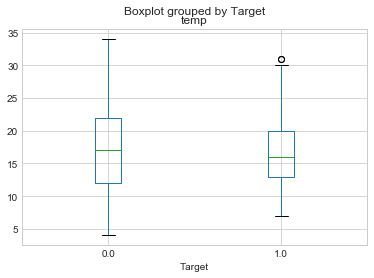

In [22]:
data.boxplot(column='temp', by = 'Target')

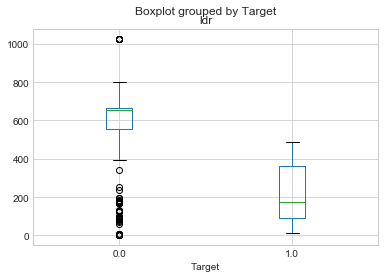

In [23]:
data.boxplot(column='ldr', by = 'Target')

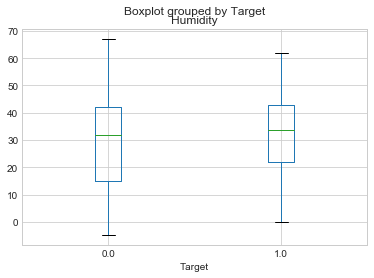

In [24]:
data.boxplot(column='Humidity', by = 'Target')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
features=data[["temp","ldr","Humidity"]]
labels=data["Target"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
predictions = logmodel.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.88      0.90      0.89       227
        1.0       0.60      0.56      0.58        62

avg / total       0.82      0.83      0.82       289



In [33]:
X_test.tail()

,temp,ldr,Humidity
822,8.0,663,33.0
576,12.0,415,42.0
510,15.0,801,35.0
803,4.0,662,45.0
424,15.0,764,35.0


In [34]:
[features.iloc[510] , labels.iloc[510]]

[temp         21.0
 ldr         796.0
 Humidity     23.0
 Name: 528, dtype: float64, 0.0]

In [46]:
logmodel.predict([features.iloc[411]])

array([ 0.])

TypeError: 'instancemethod' object has no attribute '__getitem__'